# Traitement des données

In [3]:
import pandas as pd

Traitement initial des données
Le dataset en .csv est trop lourd pour github on le convertit donc en parquet qui est plus léger

https://data.nantesmetropole.fr/explore/dataset/244400404_capteurs-ondes-electomagnetiques-nantes-metropole/information/?disjunctive.name&disjunctive.address&sort=extractjson_date&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJsaW5lIiwiZnVuYyI6IkFWRyIsInlBeGlzIjoiZXh0cmFjdGpzb25fdmFsdWUiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiZXh0cmFjdGpzb25fZGF0ZSIsIm1heHBvaW50cyI6bnVsbCwidGltZXNjYWxlIjoiaG91ciIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJuYW1lIiwic3RhY2tlZCI6IiIsImNvbmZpZyI6eyJkYXRhc2V0IjoiMjQ0NDAwNDA0X2NhcHRldXJzLW9uZGVzLWVsZWN0b21hZ25ldGlxdWVzLW5hbnRlcy1tZXRyb3BvbGUiLCJvcHRpb25zIjp7ImRpc2p1bmN0aXZlLm5hbWUiOnRydWUsImRpc2p1bmN0aXZlLmFkZHJlc3MiOnRydWUsInNvcnQiOiJleHRyYWN0anNvbl9kYXRlIn19fV0sImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWV9

In [ ]:
#Le dataset est dans le .zip
df = pd.read_csv("Data_set.csv",sep=";")

FileNotFoundError: [Errno 2] No such file or directory: 'Data_set.csv'

In [ ]:
df.to_parquet("Data_set.parquet", index=False)

In [25]:
df = pd.read_parquet("Data_set.parquet")

In [26]:
df.head()

,Identifiant,Nom du capteur,Statut,Date du relevé,Valeur relevée (V/m),Date de dernière mise à jour,Valeur du dernier relevé (V/m),Adresse,Image du capteur,geolocalisation,derniere_maj,isover,diffdateprocess
0,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-16T19:06:09+01:00,1.02,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25557
1,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-17T03:06:10+01:00,0.95,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25549
2,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-18T19:06:10+01:00,0.99,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25509
3,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-19T19:06:08+01:00,1.03,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25485
4,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-20T05:06:10+01:00,0.98,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25475


Interpretation des colonnes:
- Identifiant: une série de chiffres et lettres uniques liés au capteur utilisé
- Nom: le nom du capteur
- Statut: le statut du capteur (en service, hors service, ...)
- Date du relevé: la date du relevé format (AAAA-MM-JJ HH:MM:SS)
- Valeur: la valeur du relevé
- Date de la derniière Màj
- Valeur du dernier relevé : relevé précédent
- Adresse: l'adresse du capteur
- Image : une image du capteur
- Geolocalisation : les coordonnées du capteur
- Dernière_maj: Si le capteur a été mis à jour
- Isover : Si le capteur est en surcharge
- Diffdateprocess : différence entre la date de relevé et la date de mise à jour

In [27]:
#On split la colonne geolocalisation en deux colonnes X et Y
df[['X', 'Y']] = df['geolocalisation'].str.split(', ', n=1, expand=True)
df.head()

,Identifiant,Nom du capteur,Statut,Date du relevé,Valeur relevée (V/m),Date de dernière mise à jour,Valeur du dernier relevé (V/m),Adresse,Image du capteur,geolocalisation,derniere_maj,isover,diffdateprocess,X,Y
0,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-16T19:06:09+01:00,1.02,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25557,47.18541,-1.720456
1,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-17T03:06:10+01:00,0.95,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25549,47.18541,-1.720456
2,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-18T19:06:10+01:00,0.99,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25509,47.18541,-1.720456
3,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-19T19:06:08+01:00,1.03,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25485,47.18541,-1.720456
4,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-20T05:06:10+01:00,0.98,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25475,47.18541,-1.720456


In [28]:
#On drop les colonnes inutiles

df = df.drop(columns=['geolocalisation','Valeur du dernier relevé (V/m)','Identifiant','Statut','Nom du capteur','Date de dernière mise à jour','Adresse','Image du capteur','derniere_maj','isover','diffdateprocess'])
df.head()

,Date du relevé,Valeur relevée (V/m),X,Y
0,2022-01-16T19:06:09+01:00,1.02,47.18541,-1.720456
1,2022-01-17T03:06:10+01:00,0.95,47.18541,-1.720456
2,2022-01-18T19:06:10+01:00,0.99,47.18541,-1.720456
3,2022-01-19T19:06:08+01:00,1.03,47.18541,-1.720456
4,2022-01-20T05:06:10+01:00,0.98,47.18541,-1.720456


In [29]:
df.head()

,Date du relevé,Valeur relevée (V/m),X,Y
0,2022-01-16T19:06:09+01:00,1.02,47.18541,-1.720456
1,2022-01-17T03:06:10+01:00,0.95,47.18541,-1.720456
2,2022-01-18T19:06:10+01:00,0.99,47.18541,-1.720456
3,2022-01-19T19:06:08+01:00,1.03,47.18541,-1.720456
4,2022-01-20T05:06:10+01:00,0.98,47.18541,-1.720456


In [30]:
#On transforme les colonnes X et Y en float
df['X'] = df['X'].str.replace(',','.')
df['Y'] = df['Y'].str.replace(',','.')

df['Y'] = df['Y'].astype(float)
df['X'] = df['X'].astype(float)

#On transforme la collonne date du relevé en datetime
df['Date du relevé'] = pd.to_datetime(df['Date du relevé'])
df.head()

C:\Users\marec\AppData\Local\Temp\ipykernel_3640\2634270546.py:9: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date du relevé'] = pd.to_datetime(df['Date du relevé'])


,Date du relevé,Valeur relevée (V/m),X,Y
0,2022-01-16 19:06:09+01:00,1.02,47.18541,-1.720456
1,2022-01-17 03:06:10+01:00,0.95,47.18541,-1.720456
2,2022-01-18 19:06:10+01:00,0.99,47.18541,-1.720456
3,2022-01-19 19:06:08+01:00,1.03,47.18541,-1.720456
4,2022-01-20 05:06:10+01:00,0.98,47.18541,-1.720456


In [33]:
#Trions les données par date
df = df.sort_values(by='Date du relevé')
df.head()

,Date du relevé,Valeur relevée (V/m),X,Y
306325,2020-03-04 01:06:09+01:00,1.93,47.208418,-1.574232
385183,2020-03-04 01:06:10+01:00,2.55,47.211599,-1.558970
6340,2020-03-04 01:06:12+01:00,1.12,47.206345,-1.541389
92691,2020-03-04 03:06:10+01:00,1.77,47.208418,-1.574232
728124,2020-03-04 03:06:10+01:00,1.80,47.211599,-1.558970


In [37]:
#on verfie que Valeur du relevé est bien un float
df['Valeur relevée (V/m)'] = df['Valeur relevée (V/m)'].astype(float)
df.head()

,Date du relevé,Valeur relevée (V/m),X,Y
306325,2020-03-04 01:06:09+01:00,1.93,47.208418,-1.574232
385183,2020-03-04 01:06:10+01:00,2.55,47.211599,-1.558970
6340,2020-03-04 01:06:12+01:00,1.12,47.206345,-1.541389
92691,2020-03-04 03:06:10+01:00,1.77,47.208418,-1.574232
728124,2020-03-04 03:06:10+01:00,1.80,47.211599,-1.558970


In [31]:
#On sauvergade le jeu de données
df.to_parquet("comp.parquet", index=False)

In [46]:
#On cherhhe les max et les min de X et Y
print(df['X'].max())
print(df['X'].min())   
print(df['Y'].max())
print(df['Y'].min())

47.29719
47.145474
-1.394277
-1.759322


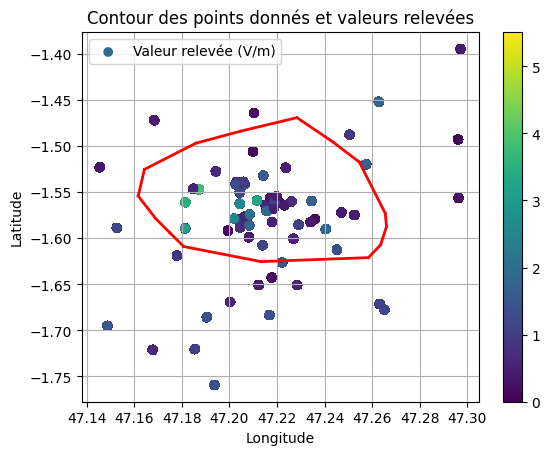

In [54]:
#On trace les données en fonction de X et Y on instaure une couleur en fonction de la valeur du relevé
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import numpy as np

# Coordonnées
Y_nantes = [47.26207237693615, 47.26603839034966, 47.263564975387254, 47.25844406725748,
     47.225497620211236, 47.21325915452311, 47.20008968236988, 47.18072711288377,
     47.17513388626106, 47.16892091756998, 47.1616235603801, 47.164233502644635,
     47.18587971114895, 47.20457815934575, 47.22837258535146, 47.24350102944418,
     47.25460728678873, 47.25906700474962, 47.265534980666274]

X_nantes = [-1.5835580484642375, -1.587312999949284, -1.607131554651009, -1.621020333662162,
     -1.6212480185639744, -1.6253463467967766, -1.6176050601348169, -1.6089530338655678,
     -1.59460888505077, -1.5784432570213935, -1.5540809725264126, -1.5251649899949848,
     -1.4967043772672017, -1.483726337863338, -1.4689268192448957, -1.4953382678562677,
     -1.5171960184311928, -1.554991712133662, -1.5729788193776173]

# Conversion en tableau numpy
points = np.column_stack((X_nantes, Y_nantes))

# Calcul de l'enveloppe convexe
hull = ConvexHull(points)

# Tracé

for simplex in hull.simplices:
    plt.plot(points[simplex, 1], points[simplex, 0], 'r-', lw=2)

# Ajout du scatter plot
plt.scatter(df['X'], df['Y'], c=df['Valeur relevée (V/m)'], cmap='viridis', label="Valeur relevée (V/m)")
#On rajoute une gardient de couloir en fonction de la valeur relevée
plt.colorbar()

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Contour des points donnés et valeurs relevées")
plt.legend()
plt.grid()
plt.show()